# Excercise - Creating our own custom Model

This is a notebook that provides a quick overview of how to create your own custom model. You will be creating a simple model.
You will be utilizing Keras and Tensorflow


## Water Quality Dataset

This dataset contains water quality measurements and assessments related to potability, which is the suitability of water for human consumption. The dataset's primary objective is to provide insights into water quality parameters and assist in determining whether the water is potable or not. Each row in the dataset represents a water sample with specific attributes, and the "Potability" column indicates whether the water is suitable for consumption.

https://www.kaggle.com/datasets/uom190346a/water-quality-and-potability?select=water_potability.csv


LOADING THE DATASET

In [78]:
from google.colab import files
uploaded = files.upload()

Saving water_potability.csv to water_potability (1).csv


In [79]:
import pandas as pd

# Load the dataset
df = pd.read_csv("water_potability.csv")
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


DATA PRE-PROCESSING

In [80]:
# Display summary statistics for numerical columns
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [81]:
# Check data types of each column
print("Data types of each column:")
print(df.dtypes)

Data types of each column:
ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object


In [82]:
# Check for duplicate rows in the dataset
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [83]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


In [84]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Drop rows with missing values
df_cleaned = df.dropna()

# Verify missing values are removed
print("Missing Values After Dropping Rows:")
print(df_cleaned.isnull().sum())

# Feature Scaling
scaler = StandardScaler()
X = scaler.fit_transform(df_cleaned.iloc[:, :-1])  # Scale features except the potability

# Convert target variable to NumPy array
y = df_cleaned["Potability"].values

# Show dataset size after dropping missing values
print("Data Ready: Features Shape:", X.shape, " Target Shape:", y.shape)


Missing Values After Dropping Rows:
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64
Data Ready: Features Shape: (2011, 9)  Target Shape: (2011,)


SPLITTING THE DATA

In [85]:
from sklearn.model_selection import train_test_split

# Split into training (70%) and temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size = 0.30, random_state = 42, stratify = y)

# Split temp into validation (15%) and test (15%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size = 0.50, random_state = 42, stratify = y_temp)

# Show dataset sizes
print(f"Training Set: {X_train.shape}, Labels: {y_train.shape}")
print(f"Validation Set: {X_val.shape}, Labels: {y_val.shape}")
print(f"Testing Set: {X_test.shape}, Labels: {y_test.shape}")


Training Set: (1407, 9), Labels: (1407,)
Validation Set: (302, 9), Labels: (302,)
Testing Set: (302, 9), Labels: (302,)


BUILDING THE MODEL

In [89]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Computed class weights to address class imbalance challenge
class_weights = compute_class_weight(class_weight = 'balanced', classes = np.unique(y_train), y = y_train)
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

# Building the model
model = Sequential()

# Input layer
model.add(Dense(128, input_shape = (X_train.shape[1],), activation = 'relu', kernel_regularizer = l2(0.001)))
model.add(BatchNormalization())

# Hidden layer 1
model.add(Dense(64, activation = 'relu', kernel_regularizer = l2(0.01)))
model.add(Dropout(0.4))

# Hidden layer 2
model.add(Dense(32, activation = 'relu', kernel_regularizer = l2(0.01)))
model.add(Dropout(0.4))

# Output layer
model.add(Dense(1, activation = 'sigmoid'))

# Compiled the model using SGD optimizer with a reduced learning rate
optimizer = SGD(learning_rate = 0.0005, momentum = 0.9)
model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

# Display the model
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_112 (Dense)                    │ (None, 128)                 │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_25               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_113 (Dense)                    │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_56 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_114 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_57 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_115 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,161 (47.50 KB)

 Trainable params: 11,905 (46.50 KB)

 Non-trainable params: 256 (1.00 KB)

MODEL BEHAVIOUR AND GRAPHICAL REPRESENTATION

Epoch 1/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.4257 - loss: 2.1922 - val_accuracy: 0.4735 - val_loss: 1.9689 - learning_rate: 5.0000e-04
Epoch 2/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4741 - loss: 2.1041 - val_accuracy: 0.5000 - val_loss: 1.9530 - learning_rate: 5.0000e-04
Epoch 3/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4919 - loss: 2.0638 - val_accuracy: 0.5530 - val_loss: 1.9363 - learning_rate: 5.0000e-04
Epoch 4/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5031 - loss: 2.0054 - val_accuracy: 0.5497 - val_loss: 1.9230 - learning_rate: 5.0000e-04
Epoch 5/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4772 - loss: 1.9962 - val_accuracy: 0.5762 - val_loss: 1.9089 - learning_rate: 5.0000e-04
Epoch 6/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5160 - loss: 1.9724 - val_accuracy: 0.5662 - val_loss: 1.8968 - learning_rate: 5.0000e-04
Epoch 7/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5418

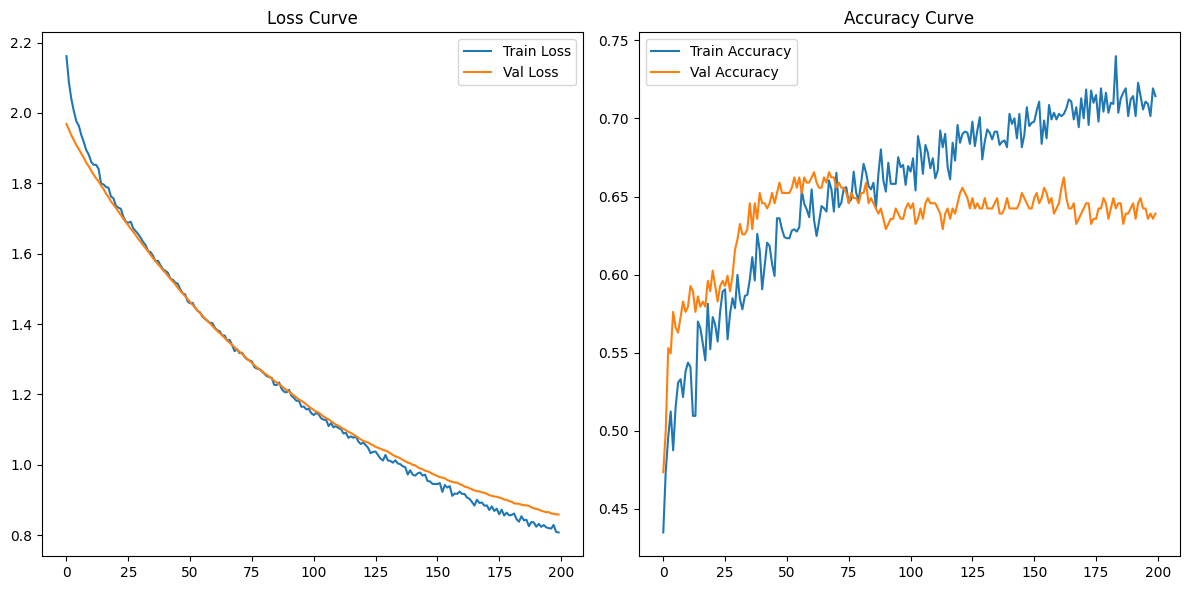

In [90]:
# Applied Early Stopping to monitor the validation loss and stop early if there's no improvement
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 4, restore_best_weights = True)

# Added learning rate scheduler to reduce the learning rate when a plateau is detected
lr_scheduler = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 3, min_lr = 1e-6)

# Training the model
history = model.fit(X_train, y_train,
                    validation_data = (X_val, y_val),
                    epochs = 200,
                    batch_size = 32,
                    verbose = 1,
                    class_weight = class_weight_dict,
                    callbacks = [early_stopping, lr_scheduler])

# Evaluate the model on training and testing sets
train_loss, train_acc = model.evaluate(X_train, y_train, verbose = 0)
test_loss, test_acc = model.evaluate(X_test, y_test, verbose = 0)

# Print accuracy results
print(f"Train Accuracy: {train_acc:.3f}")
print(f"Test Accuracy: {test_acc:.3f}")


# Classification report
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred))

# Plot training and validation loss and accuracy
plt.figure(figsize = (12, 6))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Val Loss')
plt.legend()
plt.title("Loss Curve")

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label = 'Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Val Accuracy')
plt.legend()
plt.title("Accuracy Curve")

plt.tight_layout()
plt.show()